In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd import data

In [3]:
db = data.Base()

Initializing database connection...
Database connected!


In [4]:
britain = db.query('SELECT * FROM isles LIMIT 1', spatial=True)

<AxesSubplot:>

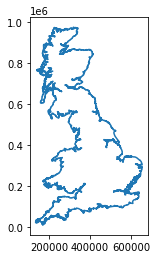

In [5]:
britain.geometry.boundary.plot()

In [6]:
# db.query('''ALTER TABLE roads
#          RENAME COLUMN "roadFunction" to road_function;''')

In [7]:
db.info('roads')

,Column,Datatype
0,id,text
1,endNode,text
2,startNode,text
3,roadNumberTOID,text
4,roadNameTOID,text
5,fictitious,boolean
6,roadClassification,text
7,road_function,text
8,formOfWay,text
9,length,bigint


In [8]:
db.count('roads')

,count
0,3760939


In [11]:
road_functions = db.distinct('road_function', 'roads').road_function.values

In [12]:
road_functions

array(['Local Road', 'Motorway', 'A Road', 'B Road',
       'Secondary Access Road', 'Local Access Road', 'Minor Road',
       'Restricted Local Access Road'], dtype=object)

In [28]:
counts = {}
for rf in road_functions:
    counts[rf] = db.query(f'''
    SELECT COUNT(*) FROM roads 
    WHERE road_function LIKE '{rf}'
    ''')['count'][0]

In [19]:
import pandas as pd

In [30]:
pd.DataFrame(counts, index=['counts']).T

,counts
Local Road,1650781
Motorway,7124
A Road,285536
B Road,159415
Secondary Access Road,133522
Local Access Road,45307
Minor Road,676167
Restricted Local Access Road,803087


In [11]:
db.query('SELECT COUNT(DISTINCT road_function) FROM roads')

,count
0,8


In [29]:
motorways = db.query('''SELECT geometry, length AS off_length FROM roads 
                     WHERE roads.road_function = 'Motorway'
                     ''',
                     spatial=True)

<AxesSubplot:>

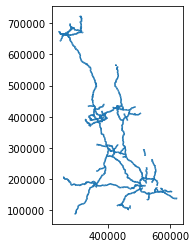

In [30]:
motorways.plot()

In [27]:
len(motorways)

7124

In [31]:
motorways.length.describe()

count     7124.000000
mean       688.376329
std       1465.762337
min          0.010000
25%         85.249034
50%        327.634818
75%        570.248699
max      19085.218266
dtype: float64

In [32]:
motorways.off_length.describe()

count     7124.000000
mean       688.381387
std       1465.757432
min          1.000000
25%         85.000000
50%        327.500000
75%        570.000000
max      19085.000000
Name: off_length, dtype: float64

In [33]:
motorways

,geometry,off_length
0,"LINESTRING (312325.450 720837.500, 312301.090 ...",959
1,"LINESTRING (312425.420 720936.220, 312413.750 ...",1132
2,"LINESTRING (312392.370 719950.550, 312417.020 ...",59
3,"LINESTRING (312441.680 719917.500, 312341.220 ...",338
4,"LINESTRING (312325.450 720837.500, 312310.390 ...",991
...,...,...
7119,"LINESTRING (604007.180 141375.650, 604037.710 ...",453
7120,"LINESTRING (614129.660 137274.310, 614151.000 ...",43
7121,"LINESTRING (614129.660 137274.310, 614049.000 ...",421
7122,"LINESTRING (613166.720 137406.930, 613340.610 ...",972


In [34]:
a_roads = db.query('''
            SELECT geometry FROM roads
            WHERE roads.road_function LIKE 'A Road'
''')

In [36]:
minor_roads = db.query('''
            SELECT geometry FROM roads
            WHERE roads.road_function LIKE 'Minor Road'
''')

In [35]:
b_roads = db.query('''
            SELECT geometry FROM roads
            WHERE roads.road_function LIKE 'B Road'
''')

In [37]:
# should be able to do this in a cleverer way

In [39]:
road_types = db.query('''
    SELECT DISTINCT(roads.road_function) FROM roads
''')

In [40]:
road_types

,road_function
0,Local Road
1,Motorway
2,A Road
3,B Road
4,Secondary Access Road
5,Local Access Road
6,Minor Road
7,Restricted Local Access Road


In [42]:
db.query('SELECT (COUNT(*)) FROM isles')

,count
0,2399
